In [1]:
#version >=1.16.1
import numpy as np
np.__version__

'1.16.1'

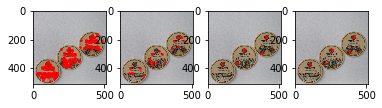

In [5]:
from skimage.io import imread
from code import Improved_SIFT
import numpy as np
import argparse
import pickle
import os
from os.path import isdir

import matplotlib.pyplot as plt

#input image file name to test
#here coin.png is used
im = imread("../images/coin.png")

sift_detector = Improved_SIFT(im)
_ = sift_detector.get_features()
kp_pyr = sift_detector.kp_pyr

if not isdir('results'):
    os.mkdir('results')


_, ax = plt.subplots(1, sift_detector.num_octave)

for i in range(sift_detector.num_octave):
    ax[i].imshow(im)

    scaled_kps = kp_pyr[i] * (2**i)
    ax[i].scatter(scaled_kps[:,0], scaled_kps[:,1], c='r', s=2.5)

plt.show()

# print kp_pyr[0]

In [15]:
print sift_detector.get_features()[0]


[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.24516264e-14, 3.25101823e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.48531988e-02,
       4.44854408e-07, 3.50123166e-08, 0.00000000e+00, 2.29312673e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.46171647e-13,
       2.08296135e-01, 5.26421751e-08, 0.00000000e+00, 3.52109130e-13,
       3.03686562e-07, 0.00000000e+00, 0.00000000e+00, 1.35039715e-02,
       3.47098596e-02, 0.00000000e+00, 0.00000000e+00, 1.84255950e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.25101823e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.77545007e-07,
       1.98634975e-02, 0.00000000e+00, 0.00000000e+00, 2.67826323e-07,
       1.22158426e-07, 0.00000000e+00, 0.00000000e+00, 3.25101823e-01,
       3.72228698e-07, 0.00000000e+00, 0.00000000e+00, 5.25385636e-14,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.25101823e-01,
     

In [16]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from collections import Counter
# X=np.array(kp_pyr[0][:,0],kp_pyr[0][:,1])
clustering = AgglomerativeClustering(n_clusters=3).fit(kp_pyr[1][:,0:1])
print Counter(clustering.labels_)


Counter({0: 13, 1: 7, 2: 5})


In [22]:
#give octave number in square 
descriptor=sift_detector.get_features()[0]


In [23]:
import math
import matplotlib.image as mpimg
from PIL import Image, ImageDraw

im = Image.open("../images/coin.png")
ans=[]
draw = ImageDraw.Draw(im)
for i in range(len(descriptor)):
    res=[]
    res90=[]
    res180=[]
    res270=[]
    #select the octave number to work on
    octave=0
    for j in range(len(descriptor)):
        if i==j:
            continue
        descriptor[i]
        temp=0
        temp90=0
        temp180=0
        temp270=0
        
        for k in range(len(descriptor[i])):
            temp+=(descriptor[i][k]-descriptor[j][k])**2
            if kp_pyr[octave][i][0]*(2**octave)!=kp_pyr[octave][j][0]*(2**octave) or kp_pyr[octave][j][1]*(2**octave)!=kp_pyr[octave][i][1]*(2**octave):
                res.append([math.sqrt(temp),i,j])
    
        for a in range(4):
            for b in range(4):
                for c in range(8):
                    temp270+=(descriptor[i][a*4*8+b*8+c]-descriptor[j][b*4*8+a*8+c])**2;
                    if kp_pyr[octave][i][0]*(2**octave)!=kp_pyr[octave][j][0]*(2**octave) or kp_pyr[octave][j][1]*(2**octave)!=kp_pyr[octave][i][1]*(2**octave):
                        res270.append([math.sqrt(temp270),i,j])
 
        for a in range(4):
                for b in range(4):
                    for c in range(8):
                        temp180+=(descriptor[i][a*4*8+b*8+c]-descriptor[j][(3-a)*4*8+b*8+c])**2;
                        if kp_pyr[octave][i][0]*(2**octave)!=kp_pyr[octave][j][0]*(2**octave) or kp_pyr[octave][j][1]*(2**octave)!=kp_pyr[octave][i][1]*(2**octave):
                            res180.append([math.sqrt(temp180),i,j])

        for a in range(4):
                for b in range(4):
                    for c in range(8):
                        temp90+=(descriptor[i][a*4*8+b*8+c]-descriptor[j][b*4*8+(3-a)*8+c])**2;
                        if kp_pyr[octave][i][0]*(2**octave)!=kp_pyr[octave][j][0]*(2**octave) or kp_pyr[octave][j][1]*(2**octave)!=kp_pyr[octave][i][1]*(2**octave):
                            res90.append([math.sqrt(temp90),i,j])
    res90.sort()
    res180.sort()
    res270.sort()
    res.sort()
    thres1=0.85
    rat=res[0][0]/max(res[1][0],.00001)
    temp=octave
    if rat<thres1:
#         print rat
        ans.append(rat)
        draw.line((kp_pyr[temp][i][0]*(2**temp), kp_pyr[temp][i][1]*(2**temp), kp_pyr[temp][res[0][2]][0]*(2**temp), kp_pyr[temp][res[0][2]][1]*(2**temp)), fill=128)
    rat=res90[0][0]/max(res90[1][0],.00001)
    if rat<thres1:
#         print rat
        ans.append(rat)
        draw.line((kp_pyr[temp][i][0]*(2**temp), kp_pyr[temp][i][1]*(2**temp), kp_pyr[temp][res90[0][2]][0]*(2**temp), kp_pyr[temp][res90[0][2]][1]*(2**temp)), fill=128)
    rat=res180[0][0]/max(res180[1][0],.00001)
    if rat<thres1:
#         print rat
        ans.append(rat)
        draw.line((kp_pyr[temp][i][0]*(2**temp), kp_pyr[temp][i][1]*(2**temp), kp_pyr[temp][res180[0][2]][0]*(2**temp), kp_pyr[temp][res180[0][2]][1]*(2**temp)), fill=128)
    rat=res270[0][0]/max(res270[1][0],.00001)
    if rat<thres1:
#         print rat
        ans.append(rat)
        draw.line((kp_pyr[temp][i][0]*(2**temp), kp_pyr[temp][i][1]*(2**temp), kp_pyr[temp][res270[0][2]][0]*(2**temp), kp_pyr[temp][res270[0][2]][1]*(2**temp)), fill=128)

        
#give output image name    
im.save("coin_demo.png")
print len(ans)

172
